<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_Customer_Churn_Datase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/customer_churn_dataset-testing-master.csv")

# EDA

In [7]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


D

# Duplicate

In [9]:
df = df.drop_duplicates()


columns

In [10]:
df = df.drop(columns=["CustomerID"])


# Missing Values

In [11]:
missing_values = df.isnull().sum()
print("Missing Values: \n", missing_values)

Missing Values: 
 Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


Encoding categorical Variables

In [16]:
from sklearn.preprocessing import LabelEncoder

df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

label_enc = LabelEncoder()

df['Subscription Type'] = label_enc.fit_transform(df['Subscription Type'])
df['Contract Length'] = label_enc.fit_transform(df['Contract Length'])

# Checking outlier

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Dummy Variables

In [18]:
df_encoded = pd.get_dummies(df_cleaned, columns=["Subscription Type", "Contract Length"], drop_first=True)


# Normalization

In [20]:
scaler = MinMaxScaler()
num_cols = df_encoded.drop(columns=["Churn"]).columns
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


# Visualization

<ipython-input-21-f1c2c39e3d37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_encoded["Churn"], palette="viridis")


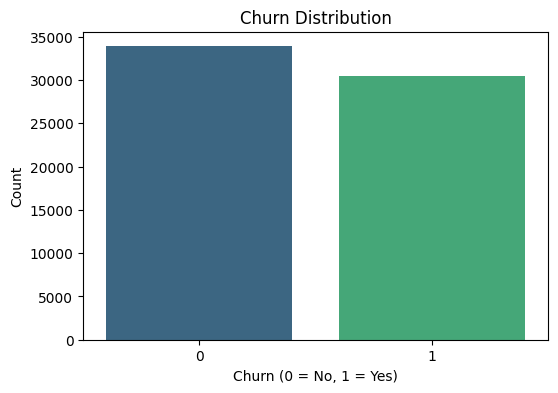

In [21]:
# Churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df_encoded["Churn"], palette="viridis")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

<ipython-input-22-15ed7d6e5743>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="Total Spend", data=df_encoded, palette="coolwarm")


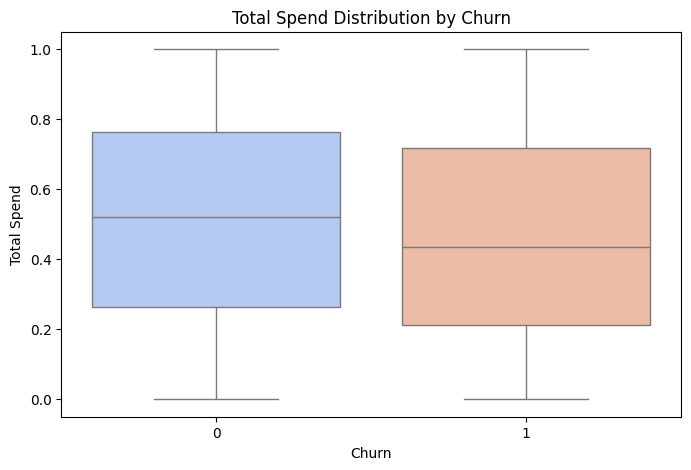

In [22]:
# Boxplot for 'Total Spend' by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x="Churn", y="Total Spend", data=df_encoded, palette="coolwarm")
plt.title("Total Spend Distribution by Churn")
plt.show()